In [5]:
import os
import glob
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
tanh = np.tanh

In [3]:
os.chdir("/Users/weilu/openmmawsem/_local/gamma_secretase_test_precision/cleaned_pdbs")

In [11]:
os.system("gcsplit  -k crystal_structure.fasta /\>/ {*}")

0

In [16]:
n = len(glob.glob("xx*"))-1

In [17]:
for i in range(1,n+1):
    os.sytem(f"python3 ~/Documents/Porter5/Porter5.py -i xx0{i} --cpu 3 --fast")

4

In [52]:
_all = []
for i in range(1, n+1):
    tmp = pd.read_table(f"xx0{i}.ss3")
    _all.append(tmp)

In [53]:
data = pd.concat(_all)

In [58]:
data = data.reset_index(drop=True).reset_index()

In [26]:
def chosen(data):
    top = max(data["Helix"], data["Sheet"], data["Coil"])
    if data["Helix"] == top:
        return 0
    elif data["Sheet"] == top:
        return 1
    else:
        return 2

In [59]:
data["chosen"] = data.apply(chosen, axis=1)

In [60]:
data.columns

Index(['index', '#', 'AA', 'SS', 'Helix', 'Sheet', 'Coil', 'chosen'], dtype='object')

In [45]:
d2 = pd.read_table("ssweight", names=["Helix", "Sheet"], sep="\s+")

In [67]:
def convert(data):
    if data["Helix"] == 1.0:
        return 0
    elif data["Sheet"] == 1.0:
        return 1
    else:
        return 2

In [68]:
d2["stride"] = d2.apply(convert, axis=1)

In [69]:
all_data = pd.concat([data, d2], axis=1)

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(all_data["chosen"], all_data["stride"])

array([[573,   0, 135],
       [  6,  82,  53],
       [ 50,  20, 479]])

In [77]:
y_true = [2, 1, 1, 1, 2, 0, 1]
y_pred = [0, 0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)


array([[1, 0, 0],
       [2, 0, 2],
       [1, 0, 1]])

In [31]:
file = "/Users/weilu/Research/server/dec_2018/1r69_openCL/OpenCL_2/movie.pdb"

In [48]:
fasta = "/Users/weilu/Research/server/dec_2018/1r69_openCL/crystal_structure.fasta"

In [56]:
def get_seq_dic(fasta):
    seq_dic = {}
    chain = None
    with open(fasta) as f:
        for line in f:
            if line[0] == ">":
    #             print(line[:19])
                assert line[:19] == ">CRYSTAL_STRUCTURE:"
                if chain is not None:
                    seq_dic[chain] = seq
                chain = line[19]
                seq = ""
            else:
                seq += line.replace("\n", "")
        seq_dic[chain] = seq
    return seq_dic

In [57]:
seq_dic

{'A': 'SISSRVKSKRIQLGLNQAELAQKVGTTQQSIEQLENGKTKRPRFLPELASALGVSVDWLLNGT'}

In [58]:
file = "/Users/weilu/Research/server/dec_2018/1r69_openCL/OpenCL_2/last_frame.pdb"

In [88]:
with open(file) as f:
    for line in f:
        if len(line) > 20:
            i = int(line[22:26])
            chain = line[21]
            res = seq_dic[chain][i-1]
            tmp = list(line)
            tmp[17:20] = inv_code_map[res]
            print("".join(tmp))
#             print(chain, int(line[22:26]), line[17:20], )

HETATM    1  CA  SER A   1      71.379  45.156   3.319  1.00  0.00           C  

HETATM    2  C   SER A   1      72.304  46.288   3.808  1.00  0.00           C  

HETATM    3  O   SER A   1      72.142  47.432   3.474  1.00  0.00           O  

HETATM    4  CB  SER A   1      70.937  44.121   4.307  1.00  0.00           B  

HETATM    5  N   ILE A   2      73.273  45.932   4.604  1.00  0.00           N  

HETATM    6  H   ILE A   2      73.406  45.011   4.873  1.00  0.00           H  

HETATM    7  CA  ILE A   2      74.270  46.861   5.186  1.00  0.00           C  

HETATM    8  C   ILE A   2      75.068  47.707   4.226  1.00  0.00           C  

HETATM    9  O   ILE A   2      75.086  48.897   4.349  1.00  0.00           O  

HETATM   10  CB  ILE A   2      75.171  45.986   6.144  1.00  0.00           B  

HETATM   11  N   SER A   3      75.723  47.056   3.277  1.00  0.00           N  

HETATM   12  H   SER A   3      75.711  46.098   3.179  1.00  0.00           H  

HETATM   13  CA 

In [89]:
fileName = file

In [91]:
import fileinput
with fileinput.FileInput(fileName, inplace=True, backup='.bak') as file:
    for line in file:
        if len(line) > 25:
            i = int(line[22:26])
            chain = line[21]
            res = seq_dic[chain][i-1]
            tmp = list(line)
            tmp[17:20] = inv_code_map[res]
            if line[:6] == "HETATM": 
                tmp[:6] = "ATOM  "
            print("".join(tmp), end='')

In [38]:
a = open(file).read().split("ENDMDL")
assert a[-1] == "\nEND\n"

In [47]:
a[0]

'REMARK   1 CREATED WITH OPENMM 7.2.1, 2018-12-11\nMODEL        1\nHETATM    1  CA  NGP A   1      34.091  11.111  -5.365  1.00  0.00           C  \nHETATM    2  C   NGP A   1      35.029  12.137  -6.087  1.00  0.00           C  \nHETATM    3  O   NGP A   1      35.807  11.834  -6.999  1.00  0.00           O  \nHETATM    4  CB  NGP A   1      34.525  10.699  -3.983  1.00  0.00           B  \nHETATM    5  N   NGP A   2      34.928  13.350  -5.651  1.00  0.00           N  \nHETATM    6  H   NGP A   2      34.302  13.595  -4.917  1.00  0.00           H  \nHETATM    7  CA  NGP A   2      35.735  14.487  -6.205  1.00  0.00           C  \nHETATM    8  C   NGP A   2      37.151  14.041  -5.750  1.00  0.00           C  \nHETATM    9  O   NGP A   2      38.182  14.046  -6.577  1.00  0.00           O  \nHETATM   10  CB  NGP A   2      35.233  15.911  -5.895  1.00  0.00           B  \nHETATM   11  N   NGP A   3      37.163  13.661  -4.416  1.00  0.00           N  \nHETATM   12  H   NGP A   3     

In [46]:
a[1]

'\nMODEL        2\nHETATM    1  CA  NGP A   1      50.143  25.238  -8.137  1.00  0.00           C  \nHETATM    2  C   NGP A   1      49.227  26.365  -7.669  1.00  0.00           C  \nHETATM    3  O   NGP A   1      48.717  27.059  -8.502  1.00  0.00           O  \nHETATM    4  CB  NGP A   1      51.595  25.354  -7.362  1.00  0.00           B  \nHETATM    5  N   NGP A   2      49.042  26.522  -6.320  1.00  0.00           N  \nHETATM    6  H   NGP A   2      49.455  25.964  -5.648  1.00  0.00           H  \nHETATM    7  CA  NGP A   2      48.197  27.546  -5.649  1.00  0.00           C  \nHETATM    8  C   NGP A   2      49.057  28.549  -4.803  1.00  0.00           C  \nHETATM    9  O   NGP A   2      49.327  28.320  -3.764  1.00  0.00           O  \nHETATM   10  CB  NGP A   2      47.668  26.803  -4.263  1.00  0.00           B  \nHETATM   11  N   NGP A   3      49.473  29.658  -5.282  1.00  0.00           N  \nHETATM   12  H   NGP A   3      49.257  29.844  -6.121  1.00  0.00           H 

In [78]:
with open("porter5_ss", "w") as out:
    for i, line in all_data.iterrows():
        if line["chosen"] == 0:
            out.write("1.0 0.0\n")
        elif line["chosen"] == 1:
            out.write("0.0 1.0\n")
        else:
            out.write("0.0 0.0\n")

In [71]:
all_data

,index,#,AA,SS,Helix,Sheet,Coil,chosen,Helix,Sheet,stride
0,0,1,N,C,0.0003,0.0002,0.9995,2,0.0,0.0,2
1,1,2,S,C,0.3993,0.0501,0.5506,2,1.0,0.0,0
2,2,3,V,H,0.6981,0.0376,0.2642,0,1.0,0.0,0
3,3,4,E,H,0.7927,0.0387,0.1686,0,1.0,0.0,0
4,4,5,R,H,0.7756,0.0457,0.1787,0,1.0,0.0,0
5,5,6,K,H,0.6755,0.0523,0.2722,0,1.0,0.0,0
6,6,7,I,C,0.3859,0.1622,0.4518,2,1.0,0.0,0
7,7,8,Y,C,0.0785,0.4231,0.4984,2,0.0,0.0,2
8,8,9,I,E,0.0398,0.5469,0.4133,1,0.0,1.0,1
9,9,10,P,E,0.0396,0.5811,0.3793,1,0.0,1.0,1


In [79]:
from pdbfixer import PDBFixer

In [80]:
pdbFile = "/Users/weilu/Research/server/dec_2018/5fn2/crystal_structure.pdb"

In [97]:
fixer = PDBFixer(filename=pdbFile)
# remove unwanted chains
chains = list(fixer.topology.chains())
a = ""
for i in chains:
    if i.id in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
        a += i.id
''.join(sorted(set(a.upper().replace(" ", ""))))

IndentationError: expected an indented block (<ipython-input-97-9572cdf8b9df>, line 7)

In [94]:
a = 'abcdefghijklmnopqrstuvwxyz'.upper()

In [96]:
a

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [105]:
def f(r):
    return 1/4(1+tanh*(70(r+1.5))*(1+tanh(70*(1.5-r)))


SyntaxError: unexpected EOF while parsing (<ipython-input-105-3639e89ec512>, line 2)

In [27]:
r = np.linspace(-3,3, 100)
def f(r, eta=5):
    return 0.5*tanh(eta*(r+1.5))+0.5*tanh(eta*(1.5-r))

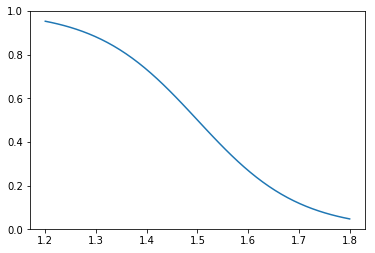

In [16]:
r2 = np.linspace(1.2,1.8)
plt.plot(r2, f2(r2))

Text(0.5, 0, 'z in nm')

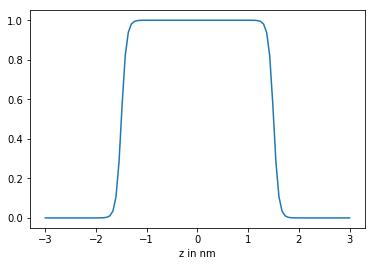

In [30]:
plt.plot(r, f(r, 10))
plt.xlabel("z in nm")

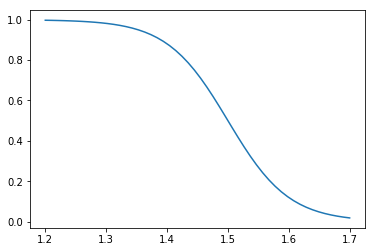

In [24]:
r2 = np.linspace(1.2,1.7)
plt.plot(r2, f(r2, eta=10))

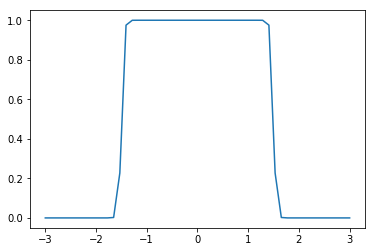

In [130]:
plt.plot(r, f(r))

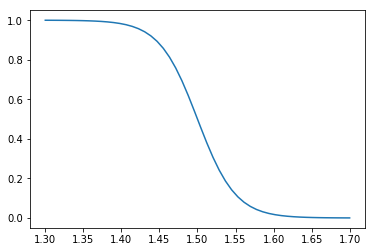

In [131]:
r2 = np.linspace(1.3,1.7)
plt.plot(r2, f(r2))

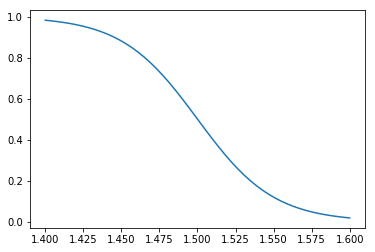

In [132]:
r2 = np.linspace(1.4,1.6)
plt.plot(r2, f(r2))